In [1]:
"""
# GOOGLE-NET Image CLASSIFICATION :
"""
print(__doc__)


# GOOGLE-NET Image CLASSIFICATION :



In [2]:
import os
import sys
import cv2
import numpy as np

from _path import get_cut_dir, stop_if_none


# functions : for a few initial path setting



In [3]:
dir_dnn = get_cut_dir('classify') + 'src_dnn/'
dir_img = get_cut_dir('classify') + 'src_img/mushroom/'

font_color = (0, 51, 249) # BGR <- rgb(249, 51, 0)

In [4]:
files = [ filename
            for filename in os.listdir(dir_img)
            if filename.split('.')[-1] == 'jpg']

ask_sheets = {}
for i, filename in enumerate(files):
    ask_sheets[str(i)] = ['id', 0, filename]

In [5]:
model = dir_dnn + 'bvlc_googlenet.caffemodel'
config = dir_dnn + 'deploy.prototxt'

classes = dir_dnn + 'classification_classes_ILSVRC2012.txt'

In [6]:
# Load class names = 1000 classified lables
classNames = None
with open(classes, 'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')

In [7]:
def get_id_CNN(filename, model, config):
    img = cv2.imread(filename)
    if img is None:
        print("Null Object!")
        raise EnvironmentError

    # LOAD CLASS NAMES -> if net.empty():
    net = cv2.dnn.readNet(model, config)
    if net.empty():
        print('Network load failed!')
        raise EnvironmentError

    inputBlob = cv2.dnn.blobFromImage(img, 1, (224, 224), (104, 117, 123))
    net.setInput(inputBlob)
    prob = net.forward()
    out = prob.flatten()
    return img, out

def put_result(img, out, font_color=(0, 51, 249), echo=True):
    classId = np.argmax(out)
    confidence = out[classId]
    text = f"Id={classNames[classId]:} [{confidence * 100:5.2f}%]"
    cv2.putText(
                img=img,
                text=text,
                org=(10, 30),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.7,
                color=font_color,
                thickness=2,
                # lineType=cv2.LINE_AA,
            )
    if echo:
        print(text, flush=1)
        # cv2.imshow('img', img)
    cv2.waitKey()
    return classNames[classId], confidence

In [8]:
for key in ask_sheets.keys():
    filename = dir_img + ask_sheets[key][-1]

    img, out = get_id_CNN(filename, model, config)
    answer, conf = put_result(img, out, echo=1)
    ask_sheets[key][0], ask_sheets[key][1] = answer, conf

Id=earthstar [53.70%]
Id=agaric [75.76%]
Id=hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa [84.64%]
Id=tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui [44.92%]
Id=hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa [54.36%]
Id=hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa [42.28%]
Id=hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa [33.46%]
Id=stinkhorn, carrion fungus [38.62%]
Id=gyromitra [55.65%]


In [9]:
for idx, vals in enumerate(ask_sheets.values()):
    vals = list(vals)
    id, conf, filename = vals[0], vals[1], vals[2]

    print(f"{idx:02}. {filename:18} : {id[:29]:30} ... | {conf*100:>0.2f} %")

cv2.destroyAllWindows()

00. mush01.jpg         : earthstar                      ... | 53.70 %
01. mush02.jpg         : agaric                         ... | 75.76 %
02. mush03.jpg         : hen-of-the-woods, hen of the   ... | 84.64 %
03. mush04.jpg         : tailed frog, bell toad, ribbe  ... | 44.92 %
04. mush05.jpg         : hen-of-the-woods, hen of the   ... | 54.36 %
05. mush06.jpg         : hen-of-the-woods, hen of the   ... | 42.28 %
06. mush07.jpg         : hen-of-the-woods, hen of the   ... | 33.46 %
07. mush08.jpg         : stinkhorn, carrion fungus      ... | 38.62 %
08. mush09.jpg         : gyromitra                      ... | 55.65 %


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.DataFrame.from_dict(ask_sheets).T
df.columns = ['id','conf','filename']

print('\n\n', df.describe())
print('\n\n', df.info())



                                                        id    conf    filename
count                                                   9  9.0000           9
unique                                                  6  9.0000           9
top     hen-of-the-woods, hen of the woods, Polyporus ...  0.5565  mush09.jpg
freq                                                    4  1.0000           1
<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        9 non-null      object
 1   conf      9 non-null      object
 2   filename  9 non-null      object
dtypes: object(3)
memory usage: 288.0+ bytes


 None


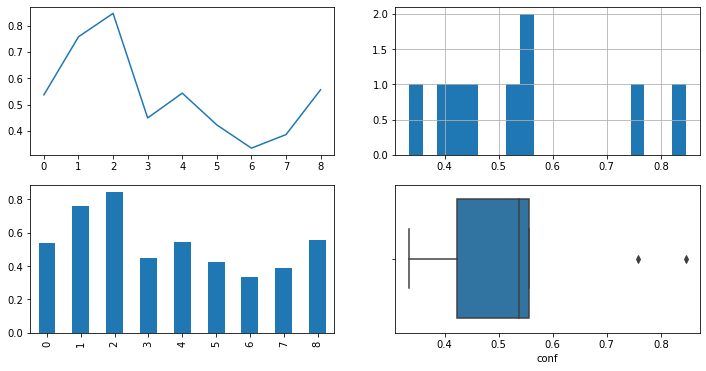

In [12]:
# BAR 플롯이 필요하면, plot.barh() / .bar() 사용!

fig, axes = plt.subplots(2,2, figsize=(12,6))

df.conf.plot(ax=axes[0,0])
df.conf.hist(bins=20, ax=axes[0,1])
df.conf.plot.bar(ax=axes[1,0])
sns.boxplot(df.conf, ax=axes[1,1])
plt.show()

# input('\n\nCONTINUE?')